# Chapter 4: data processing using midap-tools

In this chapter, we will learn how we can use FluidExperiment objects to perform data operations on all loaded samples. these include filtering of data and data transformations

We start by loading the example data

In [67]:
from fluid_experiment.fluid_experiment import FluidExperiment

PATH = "../../data/midap-tools_example"
experiment = FluidExperiment(PATH)
print(experiment)

Loading sample at position pos1 for color channel YFP
Loading sample at position pos1 for color channel CFP
Loading sample at position pos2 for color channel YFP
Loading sample at position pos2 for color channel CFP
Loading sample at position pos3 for color channel YFP
Loading sample at position pos3 for color channel CFP
Loading sample at position pos4 for color channel YFP
Loading sample at position pos4 for color channel CFP
Loading sample at position pos5 for color channel YFP
Loading sample at position pos5 for color channel CFP
Loading sample at position pos6 for color channel YFP
Loading sample at position pos6 for color channel CFP
Successfully loaded data with consistent number of frames: 143
FluidExperiment with name: experiment
Path: ../../data/midap-tools_example
6 positions: pos1, pos2, pos3, pos4, pos5, pos6
2 color channels: YFP, CFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackI

## Data transformations

We first start with some data transformations

often we may want to log transform data (i.e area or major axis length) to better align with exponential processes

In [68]:
experiment.calculate_transform_data("major_axis_length")
print(experiment)

FluidExperiment with name: experiment
Path: ../../data/midap-tools_example
6 positions: pos1, pos2, pos3, pos4, pos5, pos6
2 color channels: YFP, CFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackID_d1, trackID_d2, split, trackID_mother, first_frame, last_frame, area, edges_min_row, edges_min_col, edges_max_row, edges_max_col, intensity_max, intensity_mean, intensity_min, minor_axis_length, major_axis_length, x, y, major_axis_length_log



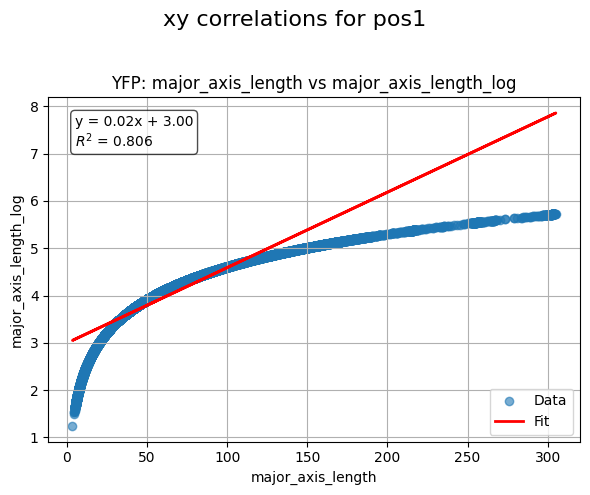

In [69]:
experiment.plot_xy_correlation("major_axis_length","major_axis_length_log","pos1","YFP")

*** 

As we note, this operation added a `major_axis_length_log` column to the data. By default, the `calculate_transform_data` performs a log transform and adds a column with the name + postfix _log

however, the method allows us to perform other transformations as well. There are two other preset transformations that are supported, inverse and square
In order to perform these, we need to define the type and the postfix we want to use

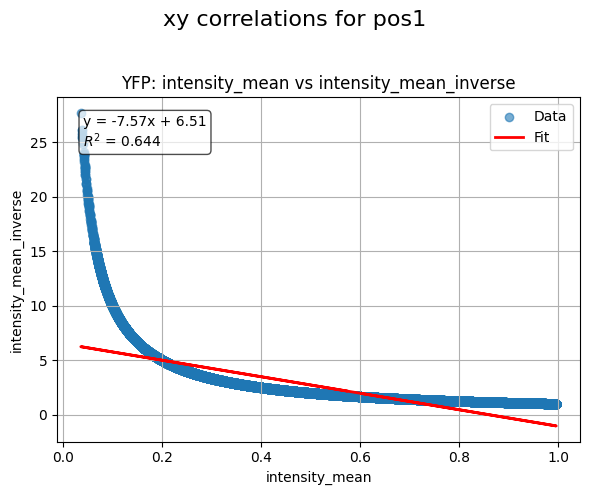

In [70]:
experiment.calculate_transform_data(column = "intensity_mean",postfix = "_inverse",type = "inverse")
experiment.plot_xy_correlation("intensity_mean","intensity_mean_inverse","pos1","YFP")

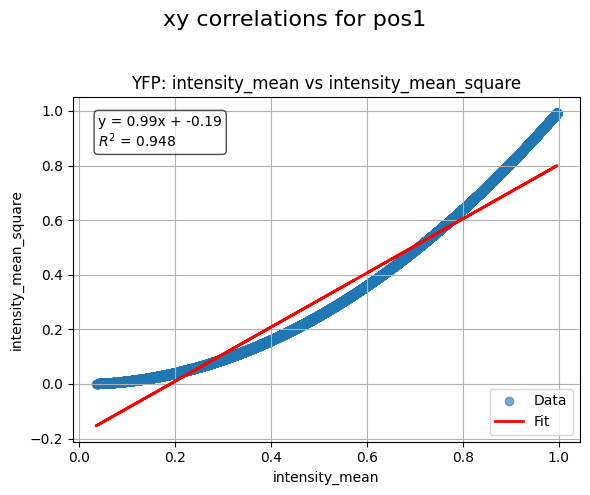

In [71]:
experiment.calculate_transform_data(column = "intensity_mean",postfix = "_square",type = "square")
experiment.plot_xy_correlation("intensity_mean","intensity_mean_square","pos1","YFP")

***

To allow even more flexibility, the transform operation can be used with a custom function.
This allows us to define any operation on a pd.Series that should be applied to a specified column in all samples

Let see how we could use this to transfrom frames to hours

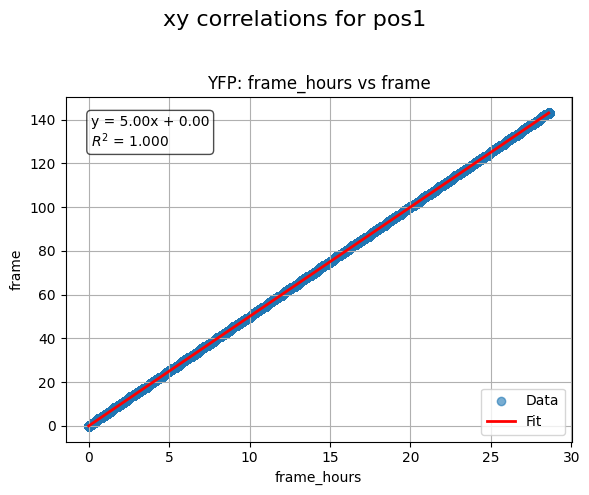

In [72]:
sampling_rate = 5

def calculate_time(x):
    return x / sampling_rate

experiment.calculate_transform_data(column= "frame",postfix = "_hours", custom_function=calculate_time)

experiment.plot_xy_correlation("frame_hours","frame","pos1","YFP")

***

As we can see, we now calculated a new column in which we calculated the hours from the frame number

In the next example we may want to adjust the zero time in addition to rescaling the data. Lets assume in this experiment we want to set some treatment that happens after 5 hours to be set to t = 0
the `calculate_transform_data` operation allows us to pass a function including arguments!
this means we do the follwing


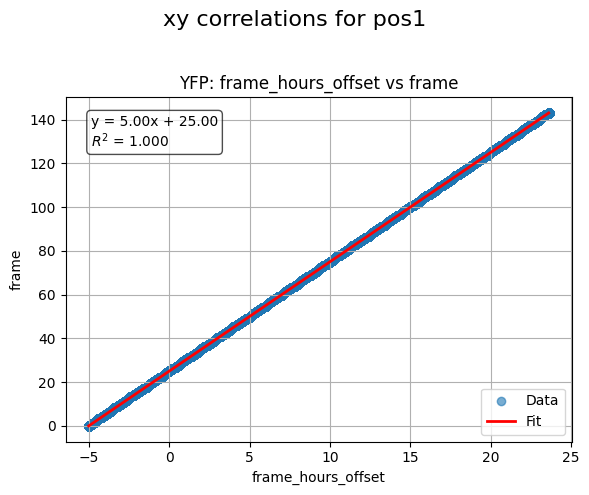

In [73]:
def calculate_time(x, sampling_rate, offset):
    return x / sampling_rate + offset

experiment.calculate_transform_data(column= "frame",postfix = "_hours_offset", custom_function=calculate_time, sampling_rate = 5, offset = -5)
experiment.plot_xy_correlation("frame_hours_offset","frame","pos1","YFP")

## Rename data

we may now want to rename some data columns. In our previous example we created `frame_hours_offset` which we may want to rename to something more sensible

FluidExperiment with name: experiment
Path: ../../data/midap-tools_example
6 positions: pos1, pos2, pos3, pos4, pos5, pos6
2 color channels: YFP, CFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackID_d1, trackID_d2, split, trackID_mother, first_frame, last_frame, area, edges_min_row, edges_min_col, edges_max_row, edges_max_col, intensity_max, intensity_mean, intensity_min, minor_axis_length, major_axis_length, x, y, major_axis_length_log, intensity_mean_inverse, intensity_mean_square, frame_hours, frame_hours_offset

FluidExperiment with name: experiment
Path: ../../data/midap-tools_example
6 positions: pos1, pos2, pos3, pos4, pos5, pos6
2 color channels: YFP, CFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackID_d1, trackID_d2, split, trackID_mother, first_frame, last_frame, area, edges_min_row, edges_min_

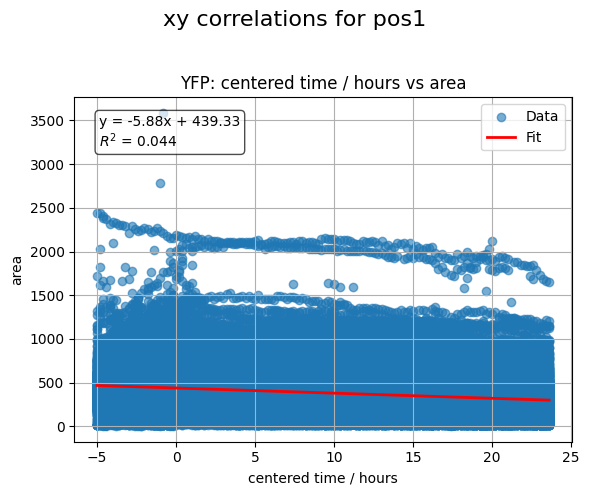

In [74]:
print(experiment)
experiment.rename_data_column(original_name= "frame_hours_offset", new_name="centered time / hours")
print(experiment)
experiment.plot_xy_correlation("centered time / hours","area", positions= "pos1", color_channels="YFP")

## Delete data

we may also with to delete some columns that we do not need anymore form our data

lets remove the `frame_hours` column that we created earlier

In [75]:
print(experiment)
experiment.drop_data_column("frame_hours")
print(experiment)

FluidExperiment with name: experiment
Path: ../../data/midap-tools_example
6 positions: pos1, pos2, pos3, pos4, pos5, pos6
2 color channels: YFP, CFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackID_d1, trackID_d2, split, trackID_mother, first_frame, last_frame, area, edges_min_row, edges_min_col, edges_max_row, edges_max_col, intensity_max, intensity_mean, intensity_min, minor_axis_length, major_axis_length, x, y, major_axis_length_log, intensity_mean_inverse, intensity_mean_square, frame_hours, centered time / hours

Dropping data columns ['frame_hours'] from position pos1 and color channel YFP
Dropping data columns ['frame_hours'] from position pos1 and color channel CFP
Dropping data columns ['frame_hours'] from position pos2 and color channel YFP
Dropping data columns ['frame_hours'] from position pos2 and color channel CFP
Dropping data columns ['frame_hours'] from position pos3 and color 

## Filter data

In many fluid experiments, we may wish to filter the data by some criteria. midap-tools supports filtering by
1. min occurence. i.e if we want to remove data for cells that were observed in less than N frames
2. max value. i.e if we want to remove the extremes of some data columns
3. min value

when filtering, the follwing will happen. the rows that are outside of the filter will be reomved from the data. the filter operation will be performed on each sample independently. The function will also create a filter history, that informs us about how much data was removed for each sample

lets start with a filter that only includes cells that are observed in at least 5 frames

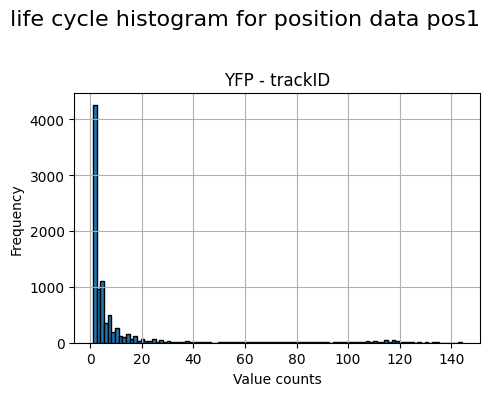

Filtering out trackID with less than 5 occurences
Filtering channel YFP at position pos1:
Filtering channel CFP at position pos1:
Filtering channel YFP at position pos2:
Filtering channel CFP at position pos2:
Filtering channel YFP at position pos3:
Filtering channel CFP at position pos3:
Filtering channel YFP at position pos4:
Filtering channel CFP at position pos4:
Filtering channel YFP at position pos5:
Filtering channel CFP at position pos5:
Filtering channel YFP at position pos6:
Filtering channel CFP at position pos6:


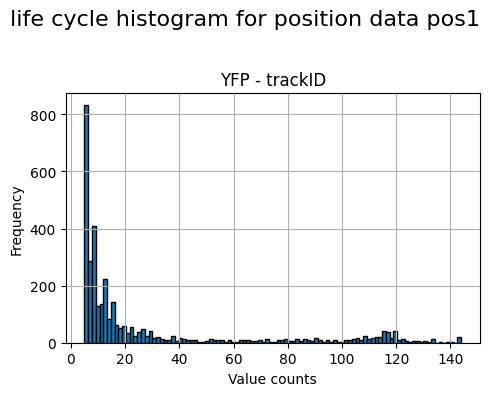

In [76]:
experiment.plot_life_cycle_histograms(columns="trackID",positions="pos1",color_channels="YFP")
experiment.filter_data("trackID", min_occurences= 5)
experiment.plot_life_cycle_histograms(columns="trackID",positions="pos1",color_channels="YFP")


***

we can then look at our filter history, to see how much data was removed for each sample

In [77]:
experiment.report_filter_history()

Filtering applied to color channel YFP at position pos1:
Number of filters applied: 1
Filter 1:
	column_filtered: trackID
	min_occurences: 5
	min_value: 
	max_value: 
	unique_values_before: 9350
	unique_values_after: 3499
	rows_before: 112168
	rows_after: 100991
	filter_rate_rows: 9
	filter_rate_unique_values: 62


Filtering applied to color channel CFP at position pos1:
Number of filters applied: 1
Filter 1:
	column_filtered: trackID
	min_occurences: 5
	min_value: 
	max_value: 
	unique_values_before: 2620
	unique_values_after: 1081
	rows_before: 37793
	rows_after: 34841
	filter_rate_rows: 7
	filter_rate_unique_values: 58


Filtering applied to color channel YFP at position pos2:
Number of filters applied: 1
Filter 1:
	column_filtered: trackID
	min_occurences: 5
	min_value: 
	max_value: 
	unique_values_before: 11768
	unique_values_after: 3259
	rows_before: 99577
	rows_after: 83701
	filter_rate_rows: 15
	filter_rate_unique_values: 72


Filtering applied to color channel CFP at position 

***

this function reports now for each sample / channel pair:

-   what filter was applied
-   what configurations were used
-   how many unique values were filtered
-   how many data rows were filtered

filters are cummulative, lets add a 2nd filter to the experiment, this time we may wish to remove extremely long cells

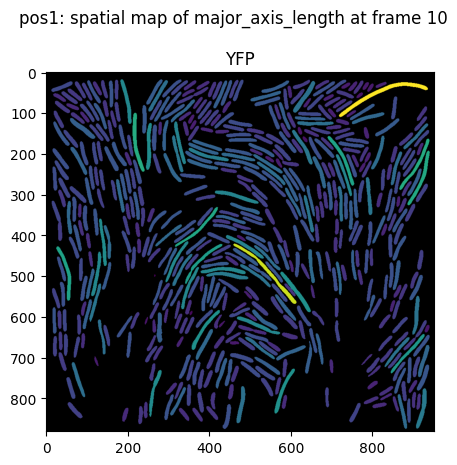

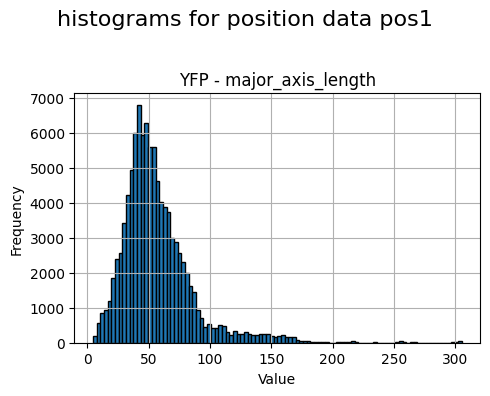

In [78]:
experiment.plot_spatial_maps(frame=10,property_column="major_axis_length", positions="pos1", color_channels="YFP")
experiment.plot_qc_histograms("major_axis_length", positions="pos1", color_channels="YFP")

***

we observe in this data, that there are some abnormaly long cells, from the histogram we see a normal distribution up to a length of ca 100, we can filter any cell longer than 100 using

Filtering out major_axis_length with less than 0 occurences
Filtering out major_axis_length with min value None and max value 100
Filtering channel YFP at position pos1:
Filtering channel CFP at position pos1:
Filtering channel YFP at position pos2:
Filtering channel CFP at position pos2:
Filtering channel YFP at position pos3:
Filtering channel CFP at position pos3:
Filtering channel YFP at position pos4:
Filtering channel CFP at position pos4:
Filtering channel YFP at position pos5:
Filtering channel CFP at position pos5:
Filtering channel YFP at position pos6:
Filtering channel CFP at position pos6:


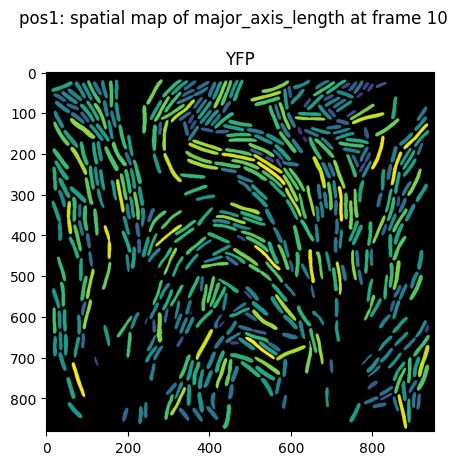

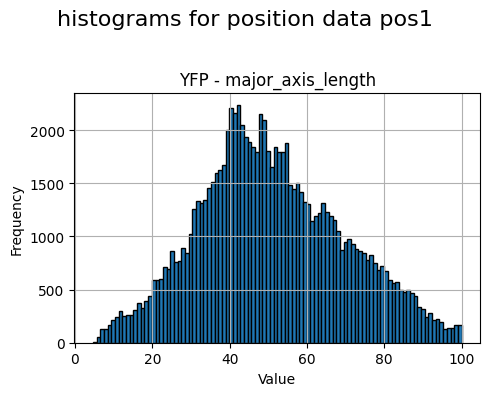

In [79]:
experiment.filter_data("major_axis_length", max_value=100)
experiment.plot_spatial_maps(frame=10,property_column="major_axis_length", positions="pos1", color_channels="YFP")
experiment.plot_qc_histograms("major_axis_length", positions="pos1", color_channels="YFP")

***

Our filter history will inform us again about all sequential operations we performed. This way we always have a record of how much was filtered at each step

In [80]:
experiment.report_filter_history()

Filtering applied to color channel YFP at position pos1:
Number of filters applied: 2
Filter 1:
	column_filtered: trackID
	min_occurences: 5
	min_value: 
	max_value: 
	unique_values_before: 9350
	unique_values_after: 3499
	rows_before: 112168
	rows_after: 100991
	filter_rate_rows: 9
	filter_rate_unique_values: 62
Filter 2:
	column_filtered: major_axis_length
	min_occurences: 0
	min_value: 
	max_value: 100
	unique_values_before: 100908
	unique_values_after: 93760
	rows_before: 100991
	rows_after: 93843
	filter_rate_rows: 7
	filter_rate_unique_values: 7


Filtering applied to color channel CFP at position pos1:
Number of filters applied: 2
Filter 1:
	column_filtered: trackID
	min_occurences: 5
	min_value: 
	max_value: 
	unique_values_before: 2620
	unique_values_after: 1081
	rows_before: 37793
	rows_after: 34841
	filter_rate_rows: 7
	filter_rate_unique_values: 58
Filter 2:
	column_filtered: major_axis_length
	min_occurences: 0
	min_value: 
	max_value: 100
	unique_values_before: 34810
	uni